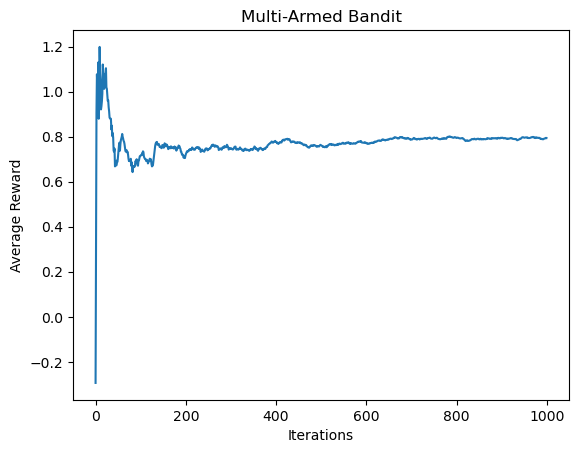

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Bandit class representing each arm of the bandit. 
#Each Bandit object has a true mean (representing the actual reward distribution) 
#and keeps track of the sampled mean and the number of samples it has receive
class Bandit:
    def __init__(self, true_mean):
        self.true_mean = true_mean
        self.sampled_mean = 0
        self.samples = 0
        
    # The pull method generates a random reward from a normal distribution with a mean equal to the true mean of the bandit.
    def pull(self):
        return np.random.randn() + self.true_mean

    # The update method updates the sampled mean based on the received reward.
    def update(self, reward):
        self.samples += 1
        self.sampled_mean = (1 - 1.0/self.samples) * self.sampled_mean + 1.0/self.samples * reward

# run_bandit function implements the main loop of the algorithm. 
# It selects the bandit with the highest sampled mean and pulls its arm, 
#then updates the sampled mean of that bandit. It keeps track of the rewards 
#obtained during each iteration and calculates the cumulative average reward.
def run_bandit(bandits, num_iterations):
    rewards = np.zeros(num_iterations)

    for i in range(num_iterations):
        best_bandit = np.argmax([bandit.sampled_mean for bandit in bandits])
        reward = bandits[best_bandit].pull()
        bandits[best_bandit].update(reward)
        rewards[i] = reward

    cumulative_average = np.cumsum(rewards) / (np.arange(num_iterations) + 1)

    return cumulative_average

# n the main function, we create a set of bandits with different true means,
# and run the bandit algorithm for a specified number of iterations. 
# The cumulative average reward is plotted using matplotlib.
def main():
    num_bandits = 5
    num_iterations = 1000
    true_means = [1.2, 0.8, 1.5, 1.1, 1.6]

    bandits = [Bandit(mean) for mean in true_means]
    cumulative_average = run_bandit(bandits, num_iterations)

    plt.plot(cumulative_average)
    plt.xlabel('Iterations')
    plt.ylabel('Average Reward')
    plt.title('Multi-Armed Bandit')
    plt.show()

if __name__ == '__main__':
    main()

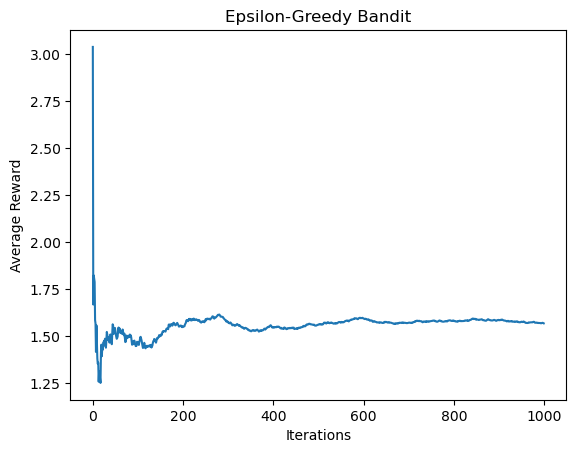

In [3]:
# the same code with Epsilon greedy:
import numpy as np
import matplotlib.pyplot as plt

class Bandit:
    def __init__(self, true_mean):
        self.true_mean = true_mean
        self.sampled_mean = 0
        self.samples = 0

    def pull(self):
        return np.random.randn() + self.true_mean

    def update(self, reward):
        self.samples += 1
        self.sampled_mean = (1 - 1.0/self.samples) * self.sampled_mean + 1.0/self.samples * reward

def epsilon_greedy(bandits, epsilon, num_iterations):
    rewards = np.zeros(num_iterations)
    num_bandits = len(bandits)

    for i in range(num_iterations):
        if np.random.random() < epsilon:
            # Explore: Choose a random bandit
            chosen_bandit = np.random.randint(num_bandits)
        else:
            # Exploit: Choose the bandit with the highest sampled mean
            chosen_bandit = np.argmax([bandit.sampled_mean for bandit in bandits])

        reward = bandits[chosen_bandit].pull()
        bandits[chosen_bandit].update(reward)
        rewards[i] = reward

    cumulative_average = np.cumsum(rewards) / (np.arange(num_iterations) + 1)

    return cumulative_average

def main():
    num_bandits = 5
    num_iterations = 1000
    true_means = [1.2, 0.8, 1.5, 1.1, 1.6]
    epsilon = 0.1

    bandits = [Bandit(mean) for mean in true_means]
    cumulative_average = epsilon_greedy(bandits, epsilon, num_iterations)

    plt.plot(cumulative_average)
    plt.xlabel('Iterations')
    plt.ylabel('Average Reward')
    plt.title('Epsilon-Greedy Bandit')
    plt.show()

if __name__ == '__main__':
    main()

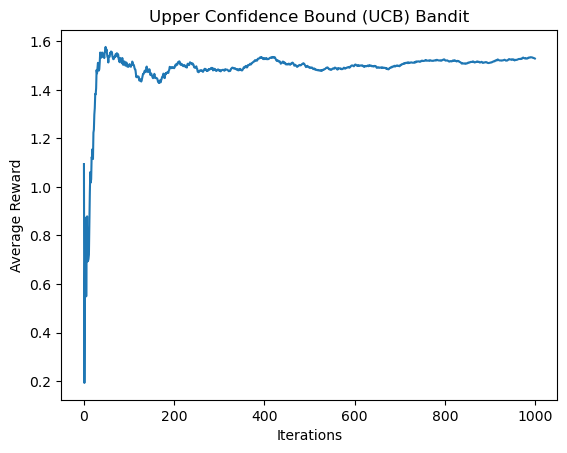

In [4]:
# the same code with UCB implementation:
import numpy as np
import matplotlib.pyplot as plt

class Bandit:
    def __init__(self, true_mean):
        self.true_mean = true_mean
        self.sampled_mean = 0
        self.samples = 0

    def pull(self):
        return np.random.randn() + self.true_mean

    def update(self, reward):
        self.samples += 1
        self.sampled_mean = (1 - 1.0/self.samples) * self.sampled_mean + 1.0/self.samples * reward

def ucb(bandits, num_iterations):
    rewards = np.zeros(num_iterations)
    num_bandits = len(bandits)

    for i in range(num_iterations):
        if i < num_bandits:
            # Initially, play each bandit once
            chosen_bandit = i
        else:
            # Choose the bandit with the highest UCB
            ucb_values = [bandit.sampled_mean + np.sqrt(2 * np.log(i) / bandit.samples) for bandit in bandits]
            chosen_bandit = np.argmax(ucb_values)

        reward = bandits[chosen_bandit].pull()
        bandits[chosen_bandit].update(reward)
        rewards[i] = reward

    cumulative_average = np.cumsum(rewards) / (np.arange(num_iterations) + 1)

    return cumulative_average

def main():
    num_bandits = 5
    num_iterations = 1000
    true_means = [1.2, 0.8, 1.5, 1.1, 1.6]

    bandits = [Bandit(mean) for mean in true_means]
    cumulative_average = ucb(bandits, num_iterations)

    plt.plot(cumulative_average)
    plt.xlabel('Iterations')
    plt.ylabel('Average Reward')
    plt.title('Upper Confidence Bound (UCB) Bandit')
    plt.show()

if __name__ == '__main__':
    main()


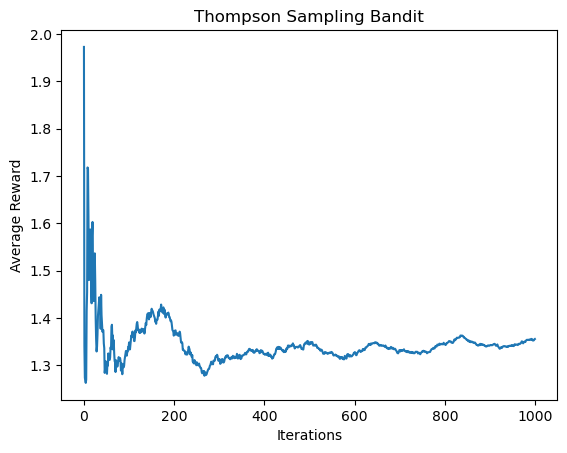

In [6]:
# the MAB code with Thomson Sampling
import numpy as np
import matplotlib.pyplot as plt

class Bandit:
    def __init__(self, true_mean):
        self.true_mean = true_mean
        self.sampled_mean = 0
        self.samples = 0

    def pull(self):
        return np.random.randn() + self.true_mean

    def update(self, reward):
        self.samples += 1
        self.sampled_mean = (1 - 1.0/self.samples) * self.sampled_mean + 1.0/self.samples * reward

def thompson_sampling(bandits, num_iterations):
    rewards = np.zeros(num_iterations)
    num_bandits = len(bandits)

    for i in range(num_iterations):
        # Sample from the posterior distribution of each bandit's true mean
        samples = [np.random.randn() + bandit.sampled_mean for bandit in bandits]

        # Choose the bandit with the highest sampled value
        chosen_bandit = np.argmax(samples)

        reward = bandits[chosen_bandit].pull()
        bandits[chosen_bandit].update(reward)
        rewards[i] = reward

    cumulative_average = np.cumsum(rewards) / (np.arange(num_iterations) + 1)

    return cumulative_average

def main():
    num_bandits = 5
    num_iterations = 1000
    true_means = [1.2, 0.8, 1.5, 1.1, 1.6]

    bandits = [Bandit(mean) for mean in true_means]
    cumulative_average = thompson_sampling(bandits, num_iterations)

    plt.plot(cumulative_average)
    plt.xlabel('Iterations')
    plt.ylabel('Average Reward')
    plt.title('Thompson Sampling Bandit')
    plt.show()

if __name__ == '__main__':
    main()
